<a href="https://colab.research.google.com/github/anmolkumar0717/pyTorch/blob/main/03_PyTorch_Compouter_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Computer Vision


## Computer Vision library for pytorch is TORCHVISION

In [1]:
# torchvision.datasets
# torchvision.models
# torchvision.transform
# torch.utils.data.Datasets
# torch.utils.data.DataLoader

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Getting a dataset

## The dataset we are using is FashsionMNIST from torchvision.datasets

In [3]:
# setup training data

train_data=datasets.FashionMNIST(
    root="data",  # where to download data to ?
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None           # To change the labels of the data
)

100%|██████████| 26421880/26421880 [00:11<00:00, 2313058.60it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 137067.85it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2546966.98it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6125468.65it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
# for test dataset

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [5]:
image,label=train_data[0]

In [6]:
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
len(train_data) , len(test_data)

(60000, 10000)

In [8]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
print(f"Image shape: {image.shape} in the format of the [Color_channel,height,width] and label is {class_name[label]}" )

Image shape: torch.Size([1, 28, 28]) in the format of the [Color_channel,height,width] and label is Ankle boot


image shape:torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0

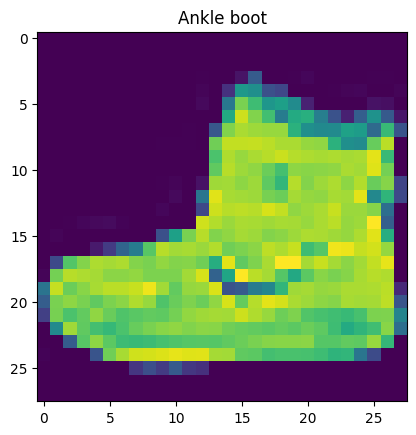

In [11]:
# VIsualization the data
import matplotlib.pyplot as plt

image,label=train_data[0]

print(f"image shape:{image.shape}")
print(image)
plt.title(class_name[label])
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

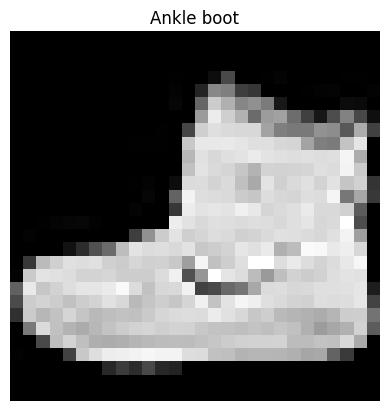

In [12]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)

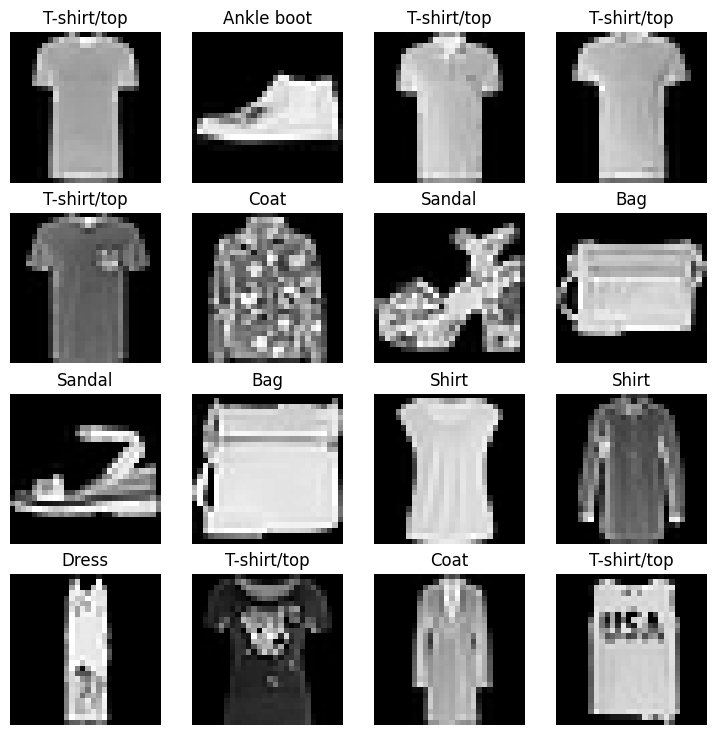

In [13]:
# plot more images usinf the torch.randn function

# torch.manual_seed(42)
plt.figure(figsize=(9,9))
rows,columns=4,4
for i in range(1,rows*columns+1):
  random_idx=torch.randint(1,len(train_data),size=[1]).item()
  random_image,random_label=train_data[random_idx]
  plt.subplot(rows,columns,i)
  plt.imshow(random_image.squeeze(),cmap="gray")
  plt.title(class_name[random_label])
  plt.axis(False)


# prepare DataLoader

DataLoader terns our dataset into python iterable.

More specifically, we want to tern them into batch size or the mini-batch size

In [14]:
from torch.utils.data import DataLoader

In [15]:
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=32,
                            shuffle=True)

In [16]:
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=32,
                           shuffle=False)

In [17]:
train_features_batch, train_label_batch=next(iter(train_dataloader))

# Model 0 :Building a base line model


a base model which you can improve the model

In [18]:
# flatten layer

flatten_model=nn.Flatten()

x=train_features_batch[0]

sample_output=flatten_model(x)

print(f"Flatten model output : {sample_output}, original output:{x} ,shape of flattenlayer:{sample_output.shape} shape of the original_output:{x.shape}")


Flatten model output : tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
     

In [19]:
from torch import nn
torch.manual_seed(42)

class FashionMNISTModel(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)

    )

  def forward(self,x):
    return self.layer_stack(x)



In [20]:
torch.manual_seed(42)
model_0=FashionMNISTModel(input_shape=784,
                          hidden_units=10,
                          output_shape=len(class_name))

model_0.to("cpu")

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Loss function : since we are dealing with multiclass classification model so we have to use the `CrossEntropyLoss()`

### Optimizer : we have to the SGD which is `schocastic gradient descent` (torch.optim.SGD)

###For evaluation we use the `Accuracy` function from matric module



In [22]:
from pathlib import Path
import requests

if Path("helper_function.py").is_file():
  print("Already downloaded")

else:
  respo=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(respo.content)



In [23]:
from helper_function import accuracy_fn

#setup our loss function

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [24]:
### 3. Creating a funcnction to time our experiments

In [25]:
from timeit import default_timer as timmer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  total_time=end-start
  print(f"Total time on {device} :{total_time:.3f} seconds")
  return total_time





In [26]:
start_time=timmer()
#eee
####
end_time=timmer()
print_train_time(start=start_time,end=end_time,device="cpu")

Total time on cpu :0.000 seconds


4.618900000252779e-05

# creating a training loop and training a model on batches of data


In [27]:
#importing the tqdm   --> for progess bar

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_cpu=timmer()

#keep small epochs for speed progress

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n -----")
  #traing our data
  train_loss=0
  # add a loop to loop through the training batches.
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1.forward pass

    Y_preds=model_0(X)

    # 2.Calculate the loss
    loss=loss_fn(Y_preds,y)
    train_loss+=loss

    #3.optimizer zero_grad
    optimizer.zero_grad()

    #4.loss backwards
    loss.backward()

    #5 optimizer step
    optimizer.step()


    if (batch%400)==0:
      print(f"Looked at{batch*len(X)} / {len(train_dataloader.dataset)} sample ")

  train_loss/=len(train_dataloader)

  #testing our model
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,Y_test in test_dataloader:
      # Forword pss
      test_preds=model_0(X_test)

      # test loss
      test_loss+=loss_fn(test_preds,Y_test)

      # calculate the accuracy
      test_acc+=accuracy_fn(y_true=Y_test,y_pred=test_preds.argmax(dim=1))

    # calculate the loss avg per batch
    test_loss/=len(test_dataloader)

    # Calculate the accuracy per bactch
    test_acc/=len(test_dataloader)

  print(f"Train loss:{loss:.4f} | Test Loss : {test_loss:.4f} | Test Accuracy : {test_acc:.4f}")

# calculate the train time ends
train_time_end_cpu=timmer()
train_time_model0=print_train_time(start=train_time_start_cpu,
                                   end=train_time_end_cpu,
                                   device=str(next(model_0.parameters()).device)
                                  )




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 -----
Looked at0 / 60000 sample 
Looked at12800 / 60000 sample 
Looked at25600 / 60000 sample 
Looked at38400 / 60000 sample 
Looked at51200 / 60000 sample 
Train loss:0.4652 | Test Loss : 0.5095 | Test Accuracy : 82.0387
Epoch : 1 
 -----
Looked at0 / 60000 sample 
Looked at12800 / 60000 sample 
Looked at25600 / 60000 sample 
Looked at38400 / 60000 sample 
Looked at51200 / 60000 sample 
Train loss:0.6015 | Test Loss : 0.4799 | Test Accuracy : 83.1969
Epoch : 2 
 -----
Looked at0 / 60000 sample 
Looked at12800 / 60000 sample 
Looked at25600 / 60000 sample 
Looked at38400 / 60000 sample 
Looked at51200 / 60000 sample 
Train loss:0.3182 | Test Loss : 0.4766 | Test Accuracy : 83.4265
Total time on cpu :27.786 seconds


In [28]:
str(next(model_0.parameters()).device)

'cpu'

In [29]:
# creating a function for evaluating our model

torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """ Return a dictionary containg the model predictions on data_loader """
  loss, acc=0, 0
  model.eval()
  with torch.inference_mode():

    for X,Y in tqdm(dataloader):

      Y_pred=model(X)

      loss+=loss_fn(Y_pred,Y)

      acc+=accuracy_fn(y_true=Y,y_pred=Y_pred.argmax(dim=1))


    # find the avg of loss/batch
    loss/=len(dataloader)
    acc/=len(dataloader)

  return {"model_name:":model.__class__.__name__,
          "model loss": loss.item(),
          "model accuracy":acc}


model_0_result=eval_model(model=model_0,
                          dataloader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)


model_0_result




  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name:': 'FashionMNISTModel',
 'model loss': 0.47663888335227966,
 'model accuracy': 83.42651757188499}

# setup device agnostic code for our new model

In [30]:
!nvidia-smi

Tue Jun 18 12:21:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [31]:
device="cuda" if torch.cuda.is_available else "cpu"
device


'cuda'

In [32]:
model_0.to(device)

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [33]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
                      [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
                      [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
                      ...,
                      [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
                      [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
                      [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0347,  0.2171,  1.2718, -0.6801,  0.5913,  0.5407, -0.3141,  0.1579,
                      -0.1607,  1.0250], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.3778, -0.4992, -0.1694,  0.4066,  0.4166,  0.7116, -0.1699, -0.2955,
                       -0.2232,  0.3107],
                      [-0

In [34]:
# Creating a new model for FashionMNISt using the nn.ReLU non linear function

import torch
from torch import nn
class FashionMNISTv1(nn.Module):
  def __init__(self,
               input_layer:int,
               hidden_layer:int,
               output_layer:int):
    super().__init__()

    self.stack_layer=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_layer,
                  out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer,
                  out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer,
                  out_features=output_layer),
        nn.ReLU()

    )

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.stack_layer(x)



In [35]:
torch.manual_seed(42)
model_1=FashionMNISTv1(input_layer=784,
                       hidden_layer=10,
                       output_layer=10)
model_1.to(device)

FashionMNISTv1(
  (stack_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): ReLU()
  )
)

In [36]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [37]:
from helper_function import accuracy_fn
oss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)


In [40]:
def training_loop(epochs:int,
                   train_dataloader:torch.utils.data.DataLoader,
                   model:torch.nn.Module,
                   loss_fn:torch.nn.Module,
                   optimizer:torch.optim,
                   device
                   ):
  from tqdm.auto import tqdm
  start_time=timmer()
  for epoch in tqdm(range(epochs)):
    print(f"epoch {epoch} \n ------")
    train_loss=0
    for batch,(X,y) in enumerate(train_dataloader):
      model.train()

      # Forward Pass
      Y_pred=model(X)


      # Calculate the loss
      loss=loss_fn(Y_pred,y)
      train_loss+=loss

      # optimize the zero grad
      optimizer.zero_grad()

      # loss backwards
      loss.backward()

      # Optimizer Step
      optimizer.step()

      if (batch%400)==0:
        print(f"Looked at {batch*len(X)} / {len(train_dataloader.dataset)} sample")

    loss/=len(train_dataloader)



